## Homework

> Note: sometimes your answer doesn't match one of 
> the options exactly. That's fine. 
> Select the option that's closest to your solution.

### Dataset

For this homework, we'll use the Car Fuel Efficiency dataset. Download it from <a href='https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv'>here</a>.

You can do it with wget:
```bash
wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.cs

In [2]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv

--2025-10-01 07:08:28--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8001::154, 2606:50c0:8002::154, 2606:50c0:8003::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8001::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 874188 (854K) [text/plain]
Saving to: ‘car_fuel_efficiency.csv’

car_fuel_efficiency 100%[===================>] 853.70K  --.-KB/s    in 0.09s   

2025-10-01 07:08:28 (8.89 MB/s) - ‘car_fuel_efficiency.csv’ saved [874188/874188]



The goal of this homework is to create a regression model for predicting the car fuel efficiency (column `'fuel_efficiency_mpg'`).

### Preparing the dataset 

Use only the following columns:

* `'engine_displacement'`,
* `'horsepower'`,
* `'vehicle_weight'`,
* `'model_year'`,
* `'fuel_efficiency_mpg'`

In [101]:
import numpy as np
import pandas as pd

In [102]:
columns = ['engine_displacement','horsepower','vehicle_weight','model_year', 'fuel_efficiency_mpg']

In [103]:
df = pd.read_csv('car_fuel_efficiency.csv', usecols=columns)

In [104]:
df.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369


### EDA

* Look at the `fuel_efficiency_mpg` variable. Does it have a long tail? 

### Question 1

There's one column with missing values. What is it?

* `'engine_displacement'`
* `'horsepower'`
* `'vehicle_weight'`
* `'model_year'`




<Axes: >

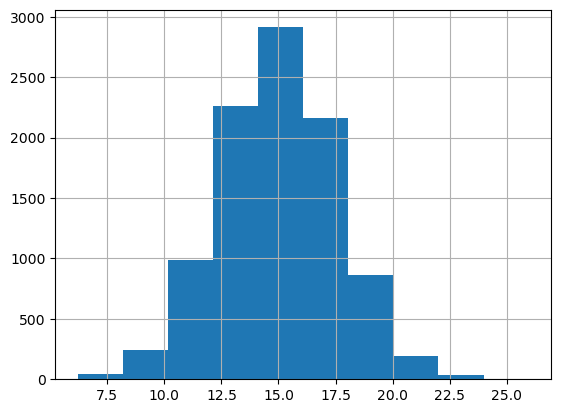

In [105]:
df.fuel_efficiency_mpg.hist()

does not appear to have a long tail

In [106]:
df.isnull().sum() > 0

engine_displacement    False
horsepower              True
vehicle_weight         False
model_year             False
fuel_efficiency_mpg    False
dtype: bool

In [107]:
df.columns[df.isnull().any()]

Index(['horsepower'], dtype='object')

answer: horsepower

### Question 2

What's the median (50% percentile) for variable `'horsepower'`?

- 49
- 99
- 149
- 199

In [108]:
df.horsepower.median()

149.0

In [109]:
df['horsepower'].quantile(.5)

np.float64(149.0)

In [110]:
df.horsepower.describe()

count    8996.000000
mean      149.657292
std        29.879555
min        37.000000
25%       130.000000
50%       149.000000
75%       170.000000
max       271.000000
Name: horsepower, dtype: float64

answer: 149

### Prepare and split the dataset

* Shuffle the dataset (the filtered one you created above), use seed `42`.
* Split your data in train/val/test sets, with 60%/20%/20% distribution.

Use the same code as in the lectures


### Question 3

* We need to deal with missing values for the column from Q1.
* We have two options: fill it with 0 or with the mean of this variable.
* Try both options. For each, train a linear regression model without regularization using the code from the lessons.
* For computing the mean, use the training only!
* Use the validation dataset to evaluate the models and compare the RMSE of each option.
* Round the RMSE scores to 2 decimal digits using `round(score, 2)`
* Which option gives better RMSE?

Options:

- With 0
- With mean
- Both are equally good

In [111]:
from sklearn.metrics import root_mean_squared_error

In [112]:
n = len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [113]:
print(n_val, n_test, n_train)

1940 1940 5824


In [114]:
df_train = df.iloc[:n_train]
df_val = df.iloc[n_train:n_train + n_val]
df_test = df.iloc[n_train + n_val:]

In [115]:
len(df_train), len(df_val), len(df_test)

(5824, 1940, 1940)

In [116]:
idx = np.arange(n)

In [117]:
idx

array([   0,    1,    2, ..., 9701, 9702, 9703], shape=(9704,))

In [118]:
np.random.seed(42)
np.random.shuffle(idx)

In [119]:
idx

array([ 483, 7506, 8795, ..., 5390,  860, 7270], shape=(9704,))

In [120]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]


In [121]:
df_train.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
483,220,144.0,2535.887591,2009,16.642943
7506,160,141.0,2741.170484,2019,16.298377
8795,230,155.0,2471.880237,2017,18.591822
1688,150,206.0,3748.164469,2015,11.818843
6217,300,111.0,2135.716359,2006,19.402209


In [122]:
len(df_train), len(df_val), len(df_test)

(5824, 1940, 1940)

In [123]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [124]:
df_train

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,220,144.0,2535.887591,2009,16.642943
1,160,141.0,2741.170484,2019,16.298377
2,230,155.0,2471.880237,2017,18.591822
3,150,206.0,3748.164469,2015,11.818843
4,300,111.0,2135.716359,2006,19.402209
...,...,...,...,...,...
5819,260,139.0,2606.972984,2009,16.964054
5820,280,132.0,4004.214323,2014,10.059094
5821,210,152.0,2500.175687,2020,17.593237
5822,250,154.0,2254.313245,2002,18.925748


In [125]:
target = 'fuel_efficiency_mpg'

y_train = df_train[target].values
y_val = df_val[target].values
y_test = df_test[target].values

In [126]:
len(y_train), len(y_val), len(y_test)

(5824, 1940, 1940)

In [127]:
df_train['fuel_efficiency_mpg']

0       16.642943
1       16.298377
2       18.591822
3       11.818843
4       19.402209
          ...    
5819    16.964054
5820    10.059094
5821    17.593237
5822    18.925748
5823    17.965284
Name: fuel_efficiency_mpg, Length: 5824, dtype: float64

In [128]:
df_train.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,220,144.0,2535.887591,2009,16.642943
1,160,141.0,2741.170484,2019,16.298377
2,230,155.0,2471.880237,2017,18.591822
3,150,206.0,3748.164469,2015,11.818843
4,300,111.0,2135.716359,2006,19.402209


In [129]:
y_train

array([16.64294342, 16.29837715, 18.59182197, ..., 17.59323665,
       18.92574819, 17.96528447], shape=(5824,))

In [130]:
del df_train[target]
del df_val[target]
del df_test[target]

In [131]:
df_train

,engine_displacement,horsepower,vehicle_weight,model_year
0,220,144.0,2535.887591,2009
1,160,141.0,2741.170484,2019
2,230,155.0,2471.880237,2017
3,150,206.0,3748.164469,2015
4,300,111.0,2135.716359,2006
...,...,...,...,...
5819,260,139.0,2606.972984,2009
5820,280,132.0,4004.214323,2014
5821,210,152.0,2500.175687,2020
5822,250,154.0,2254.313245,2002


In [132]:
df_val

,engine_displacement,horsepower,vehicle_weight,model_year
0,180,112.0,2772.134410,2020
1,260,138.0,3014.061530,2022
2,140,181.0,3652.186151,2016
3,270,105.0,2753.040847,2023
4,170,224.0,4163.375137,2003
...,...,...,...,...
1935,290,205.0,3403.401496,2019
1936,200,159.0,2752.516039,2009
1937,230,202.0,3303.000688,2008
1938,220,169.0,3293.420251,2008


In [133]:
df_test

,engine_displacement,horsepower,vehicle_weight,model_year
0,140,148.0,2704.826005,2017
1,210,136.0,3001.227490,2004
2,210,152.0,3747.467392,2021
3,190,128.0,2705.833636,2014
4,230,156.0,2505.939657,2005
...,...,...,...,...
1935,210,163.0,1972.029124,2011
1936,160,126.0,3011.588014,2009
1937,290,187.0,2440.508039,2019
1938,260,129.0,1865.404480,2019


In [134]:
y_test

array([15.80435416, 14.27237387, 11.74844072, ..., 18.40443466,
       20.50246014, 16.81624056], shape=(1940,))

In [135]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [136]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [137]:
# training model with fill 0 method

X_train = df_train.fillna(0).values

w0, w = train_linear_regression(X_train, y_train)

X_val = df_val.fillna(0).values
y_pred = w0 + X_val.dot(w)

In [141]:
# rmse witht the fill with 0 method
rmse_fill_0 = round(rmse(y_val, y_pred), 2)
rmse_fill_0

np.float64(0.52)

In [142]:
# training model with impute mean method

X_train = df_train.fillna(df_train.mean()).values

w0, w = train_linear_regression(X_train, y_train)

X_val = df_val.fillna(df_train.mean()).values
y_pred = w0 + X_val.dot(w)

In [143]:
# rmse witht the fill with mean method
rmse_fill_mean = round(rmse(y_val, y_pred), 2)
rmse_fill_mean

np.float64(0.46)



answer: With 0

### Question 4

* Now let's train a regularized linear regression.
* For this question, fill the NAs with 0. 
* Try different values of `r` from this list: `[0, 0.01, 0.1, 1, 5, 10, 100]`.
* Use RMSE to evaluate the model on the validation dataset.
* Round the RMSE scores to 2 decimal digits.
* Which `r` gives the best RMSE?

If there are multiple options, select the smallest `r`.

Options:

- 0
- 0.01
- 1
- 10
- 100

In [144]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [156]:
for seed in [42]:
    n = len(df)

    n_val = int(n * 0.2)
    n_test = int(n * 0.2)
    n_train = n - n_val - n_test

    df_train = df.iloc[:n_train]
    df_val = df.iloc[n_train:n_train + n_val]
    df_test = df.iloc[n_train + n_val:]

    idx = np.arange(n)
    
    np.random.seed(seed)
    np.random.shuffle(idx)

    df_train = df.iloc[idx[:n_train]]
    df_val = df.iloc[idx[n_train:n_train+n_val]]
    df_test = df.iloc[idx[n_train+n_val:]]

    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)

    target = 'fuel_efficiency_mpg'

   

    
    y_train = df_train[target].values
    y_val = df_val[target].values
    y_test = df_test[target].values

    del df_train[target]
    del df_val[target]
    del df_test[target]

    

In [157]:
# training model with impute mean method
for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    X_train = df_train.fillna(0).values
    
    w0, w = train_linear_regression_reg(X_train, y_train, r)
    
    X_val = df_val.fillna(0).values
    y_pred = w0 + X_val.dot(w)

    score = round(rmse(y_val, y_pred), 2)
    print(f"r: {r} ----> {score}")


r: 0 ----> 0.52
r: 0.01 ----> 0.52
r: 0.1 ----> 0.52
r: 1 ----> 0.52
r: 5 ----> 0.52
r: 10 ----> 0.52
r: 100 ----> 0.52


when rounded to two places they all give the same reslult so the smallest would be 0

answer; 0

### Question 5 

* We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
* Try different seed values: `[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]`.
* For each seed, do the train/validation/test split with 60%/20%/20% distribution.
* Fill the missing values with 0 and train a model without regularization.
* For each seed, evaluate the model on the validation dataset and collect the RMSE scores. 
* What's the standard deviation of all the scores? To compute the standard deviation, use `np.std`.
* Round the result to 3 decimal digits (`round(std, 3)`)

What's the value of std?

- 0.001
- 0.006
- 0.060
- 0.600

> Note: Standard deviation shows how different the values are.
> If it's low, then all values are approximately the same.
> If it's high, the values are different. 
> If standard deviation of scores is low, then our model is *stable*.

In [158]:
scores = []

for seed in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    n = len(df)

    n_val = int(n * 0.2)
    n_test = int(n * 0.2)
    n_train = n - n_val - n_test

    df_train = df.iloc[:n_train]
    df_val = df.iloc[n_train:n_train + n_val]
    df_test = df.iloc[n_train + n_val:]

    idx = np.arange(n)
    
    np.random.seed(seed)
    np.random.shuffle(idx)

    df_train = df.iloc[idx[:n_train]]
    df_val = df.iloc[idx[n_train:n_train+n_val]]
    df_test = df.iloc[idx[n_train+n_val:]]

    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)

    target = 'fuel_efficiency_mpg'

   

    
    y_train = df_train[target].values
    y_val = df_val[target].values
    y_test = df_test[target].values

    del df_train[target]
    del df_val[target]
    del df_test[target]

    X_train = df_train.fillna(0).values

    w0, w = train_linear_regression(X_train, y_train)
    
    X_val = df_val.fillna(0).values
    y_pred = w0 + X_val.dot(w)

    score = round(rmse(y_val, y_pred), 3)
    print(f"seed: {seed} ----> {score}")
    scores.append(score)

print()
print(f"std: {round(np.std(scores), 3)}")

    

    
    

seed: 0 ----> 0.521
seed: 1 ----> 0.521
seed: 2 ----> 0.523
seed: 3 ----> 0.516
seed: 4 ----> 0.511
seed: 5 ----> 0.528
seed: 6 ----> 0.531
seed: 7 ----> 0.509
seed: 8 ----> 0.515
seed: 9 ----> 0.513

std: 0.007


the closest result I got was 0.006

answer: 0.006

### Question 6

* Split the dataset like previously, use seed 9.
* Combine train and validation datasets.
* Fill the missing values with 0 and train a model with `r=0.001`. 
* What's the RMSE on the test dataset?

Options:

- 0.15
- 0.515
- 5.15
- 51.5

In [159]:
for seed in [9]:
    n = len(df)

    n_val = int(n * 0.2)
    n_test = int(n * 0.2)
    n_train = n - n_val - n_test

    df_train = df.iloc[:n_train]
    df_val = df.iloc[n_train:n_train + n_val]
    df_test = df.iloc[n_train + n_val:]

    idx = np.arange(n)
    
    np.random.seed(seed)
    np.random.shuffle(idx)

    df_train = df.iloc[idx[:n_train]]
    df_val = df.iloc[idx[n_train:n_train+n_val]]
    df_test = df.iloc[idx[n_train+n_val:]]

    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)

    target = 'fuel_efficiency_mpg'

   

    
    y_train = df_train[target].values
    y_val = df_val[target].values
    y_test = df_test[target].values

    del df_train[target]
    del df_val[target]
    del df_test[target]

    

In [170]:
df_full_train = pd.concat([df_train, df_val], ignore_index=True)
y_full_train = np.concatenate([y_train, y_val])

In [171]:
df_full_train

,engine_displacement,horsepower,vehicle_weight,model_year
0,240,136.0,4050.512290,2006
1,190,141.0,3195.866942,2017
2,200,184.0,3006.164370,2017
3,200,NaN,2947.143980,2022
4,250,132.0,3114.371978,2001
...,...,...,...,...
7759,200,167.0,3470.715658,2003
7760,180,144.0,3605.310144,2016
7761,180,154.0,3346.965671,2018
7762,210,152.0,2500.175687,2020


In [172]:
y_full_train

array([10.30469994, 13.47943378, 16.19065297, ..., 13.67814034,
       17.59323665, 16.06897494], shape=(7764,))

In [174]:
X_full_train = df_full_train.fillna(0).values

w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)

X_test = df_test.fillna(0).values
y_pred_test = w0 + X_test.dot(w)

score_test = round(rmse(y_test, y_pred_test), 3)
print(f"rmse_test: {score_test}")

rmse_test: 0.516


closest answer is 0.515

answer: 0.515

In [175]:
!pwd

/Users/isaachurwitz/mlzc-2025/machine-learning-zoomcamp/cohorts/2025/02-regression
